In [15]:
#https://zh-v2.d2l.ai/chapter_preliminaries/calculus.html
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [16]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [17]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [18]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [19]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [20]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

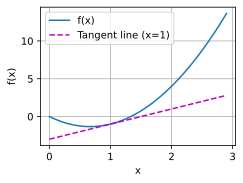

In [21]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [22]:
##自动微分
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [23]:
x.requires_grad_(True)  #等价于x=torch.arange(4.0, requires_grad=True)
x.grad  #默认值是None

In [24]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [25]:
#调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [26]:
x.grad == 4 * x

tensor([True, True, True, True])

In [27]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [28]:
# 当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。
# 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [29]:
#分离计算
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [30]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [31]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return 



In [32]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

AttributeError: 'NoneType' object has no attribute 'backward'

In [ ]:
a.grad == d / a

In [ ]:
##概率
#抽样 即掷骰子
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
#抽取一个样本
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [ ]:
#使用深度学习框架的函数同时抽取多个样本
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 3., 1., 2., 1.])

In [ ]:
# 将结果存储为32位浮点数进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000   #相对频率作为估计值

tensor([0.1810, 0.1750, 0.1570, 0.1770, 0.1460, 0.1640])

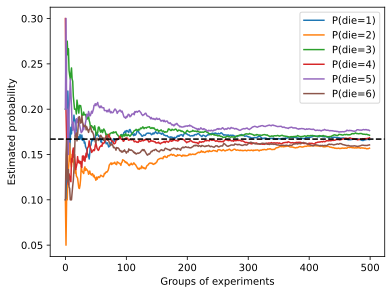

In [ ]:
#进行500组实验，每组抽取10个样本

counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [ ]:
#查找模块中的所有函数和类
import torch
print(dir(torch.distributions))
#  通常可以忽略以“__”（双下划线）开始和结束的函数，它们是Python中的特殊对象，
#  或以单个“_”（单下划线）开始的函数，它们通常是内部函数。
#  根据剩余的函数名或属性名，我们可能会猜测这个模块提供了各种生成随机数的方法， 
#  包括从均匀分布（uniform）、正态分布（normal）和多项分布（multinomial）中采样。

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [ ]:
#有关如何使用给定函数或类的更具体说明，可以调用help函数
help(torch.ones)

In [ ]:
#矢量化加速
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [ ]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [ ]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [ ]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.37156 sec'

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

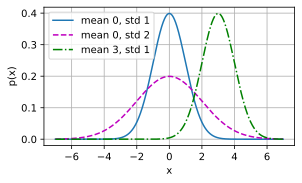

In [ ]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance#用于计算欧式距离
from sklearn.preprocessing import StandardScaler#用于对数据进行标准化操作
from sklearn.neighbors import KNeighborsRegressor#KNN算法
from sklearn.metrics import mean_squared_error#用于计算均方根误差

In [ ]:
#导入数据并提取目标字段
path = r'D:\git space\git-demo\ML\data\rent_price.csv'
file = open(path, encoding = 'gb18030', errors = 'ignore')
dc_listings = pd.read_csv(file)
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']
dc_listings = dc_listings[features]

In [ ]:
#数据初步清洗
our_acc_value = 3
dc_listings['distance'] = np.abs(dc_listings.accommodates - our_acc_value)
dc_listings = dc_listings.sample(frac=1, random_state=0)
dc_listings = dc_listings.sort_values('distance')
dc_listings['price'] = dc_listings.price.str.replace("\$|,", "").astype(float)
dc_listings = dc_listings.dropna()

C:\Users\63229\AppData\Local\Temp\ipykernel_10872\2858182119.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dc_listings['price'] = dc_listings.price.str.replace("\$|,", "").astype(float)


In [ ]:
#数据标准化
dc_listings[features] = StandardScaler().fit_transform(dc_listings[features])
normalized_listings = dc_listings

In [ ]:
#取得训练集和测试集
norm_train_df = normalized_listings[:2792]
norm_test_df = normalized_listings[2792:]

In [ ]:
#scipy包distance模块计算欧式距离
first_listings = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listings = normalized_listings.iloc[20][['accommodates', 'bathrooms']]
#用python方法做多变量KNN模型
def predict_price_multivariate(new_listing_value, feature_columns):
    temp_df = norm_train_df
    #distance.cdist计算两个集合的距离
    temp_df['distance'] = distance.cdist(temp_df[feature_columns], [new_listing_value[feature_columns]])
    temp_df = temp_df.sort_values('distance')#temp_df按distance排序
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return predicted_price
cols = ['accommodates', 'bathrooms']
norm_test_df['predicted_price'] = norm_test_df[cols].apply(predict_price_multivariate, feature_columns=cols, axis=1)
norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price']) ** 2
mse = norm_test_df['squared_error'].mean()
rmse = mse ** (1/2)
print(rmse)
#利用sklearn完成KNN
col = ['accommodates', 'bedrooms']
knn = KNeighborsRegressor()
#将自变量和因变量放入模型训练，并用测试数据测试
knn.fit(norm_train_df[cols], norm_train_df['price'])
two_features_predictions = knn.predict(norm_test_df[cols])
#计算预测值与实际值的均方根误差
two_features_mse = mean_squared_error(norm_test_df['price'], two_features_predictions)
two_features_rmse = two_features_mse ** (1/2)
print(two_features_rmse)

1.4667825805653034
1.5356457412450537


C:\Users\63229\AppData\Local\Temp\ipykernel_10872\3375521243.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_test_df['predicted_price'] = norm_test_df[cols].apply(predict_price_multivariate, feature_columns=cols, axis=1)
C:\Users\63229\AppData\Local\Temp\ipykernel_10872\3375521243.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price']) ** 2


In [ ]:
##2023/4/12
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
print("x= \n%s" % x)

x= 
[[1 2 3]
 [4 5 6]]


In [ ]:
from scipy import sparse

#创建一个二维Numpy数组，对角线为1，其余都为0
eye = np.eye(4)
print("Numpy array:\n{}".format(eye))

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
#将Numpy数组转换为CSR格式的SciPy稀疏矩阵
#http://www.scipy-lectures.org/
# 只保存非零元素
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [ ]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation: \n{}".format(eye_coo))


COO representation: 
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


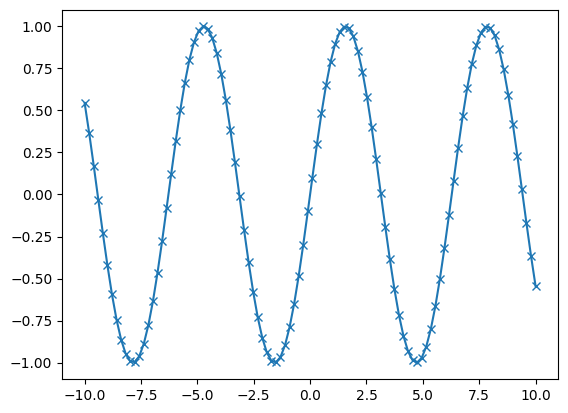

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# 在-10和10之间生成一个数列， 共100个数
x = np.linspace(-10, 10, 100)
#用正弦函数创建第二个数组
y = np.sin(x)
plt.plot(x, y, marker="x")

In [ ]:
import pandas as pd
from IPython.display import display
#创建关于人的简单数据集
data = {'Name': ["Jhon", "Anna", "Peter", "Linda"],
        'Location': ["New York", "Paris", "Berlin", "London"],
        'Age': [24, 13, 53, 33]
        }
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,Jhon,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [ ]:
#选择年龄大于30的所有行
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [ ]:
##鸢尾花分类
from sklearn.datasets import load_iris
iris_dataset = load_iris()      #load_iris 返回的iris对象是一个Bunch对象，与字典非常相似，里面包含键和值
print("keys of iris_dataset: \n{}".format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...")        #DESCR键对应的是数据集的简要说明

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
print("Target names: {}".format(iris_dataset['target_names']))     # target_names 键对应的值是一个字符串数组，包含我们要预测的花的品种

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))      # Feature names 键对应的值是一个字符串列表，对每一个特征进行了说明

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [ ]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [ ]:
print("first five rows of data:\n{}".format(iris_dataset['data'][:5]))

first five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print("type of target: {}".format(type(iris_dataset['target'])))

type of target: <class 'numpy.ndarray'>


In [ ]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [ ]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
from sklearn.model_selection import train_test_split            #train_test_split函数打乱数据集并进行拆分，训练集75%， 测试集25%
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) 

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_train shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_test.shape))



X_train shape: (112, 4)
y_train shape: (112,)
X_train shape: (38, 4)
y_train shape: (38,)


In [50]:

%matplotlib inline
import mglearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 利用X_train中的数据创建DataFrame
# 利用iris_dataset.feature_names中的字符串对数据列进行标记
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 利用DataFrame创建散点图矩阵， y_train着色
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', 
                        hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
